In [16]:
import import_ipynb #Allows you to import ipynb files
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

from utils import *
from vehicle import *
from Grid import Grid
from HybridAStar import HybridAStar
from PathSmoother import PathSmoother

#3rd party libraries used:
# Numpy
# enum
# import_ipynb
# priority queue
# dataclass
# random
# matlab
#NEed to refactor HybridAStar

In [17]:
v = Vehicle((1,1))
rows, cols = 31, 31
g = Grid(rows, cols)
obstacle_list = [(0,0), (30,30), (15,15), (0,30), (30,0), (15,0), (0,15), (30,15), (15,30), (1,15),
                (2,15), (3,15),(4,15),(5,15),(6,15),(7,15),(8,15),(9,15),(10,15),(11,15),(12,15),(13,15),(14,15),
                (15,14),(15,13),(15,12),(15,11),(15,10)]
[g.AddObstacle(obs) for obs in obstacle_list]
obs_X = [cell[0] for cell in g.obstacleCells]
obs_Y = [cell[1] for cell in g.obstacleCells]

In [18]:
start = VehicleState((29,24),np.deg2rad(180))
end = VehicleState((4,4),np.deg2rad(135))

hastar = HybridAStar(g, v)
path, states = hastar.run(start,end)

path_X = [cell[0] for cell in path] 
path_Y = [cell[1] for cell in path]

state_X = [state.position[0] for state in states] 
state_Y = [state.position[1] for state in states]
state_O = [state.orientation for state in states]

In [19]:
ps = PathSmoother()
smoothPath = ps.smooth(states, g)
smoothPath_X = [state.position[0] for state in smoothPath] 
smoothPath_Y = [state.position[1] for state in smoothPath]
smoothPath_O = [state.orientation for state in smoothPath]

In [20]:
%%capture cap --no-stderr
for state in smoothPath:
    if state.gear == Gear.Forward:
        print((state.position[0], state.position[1], state.orientation, 0))
    else:
        print((state.position[0], state.position[1], state.orientation, 1))

In [21]:
with open('output.txt', 'w') as f:
     f.write(cap.stdout)

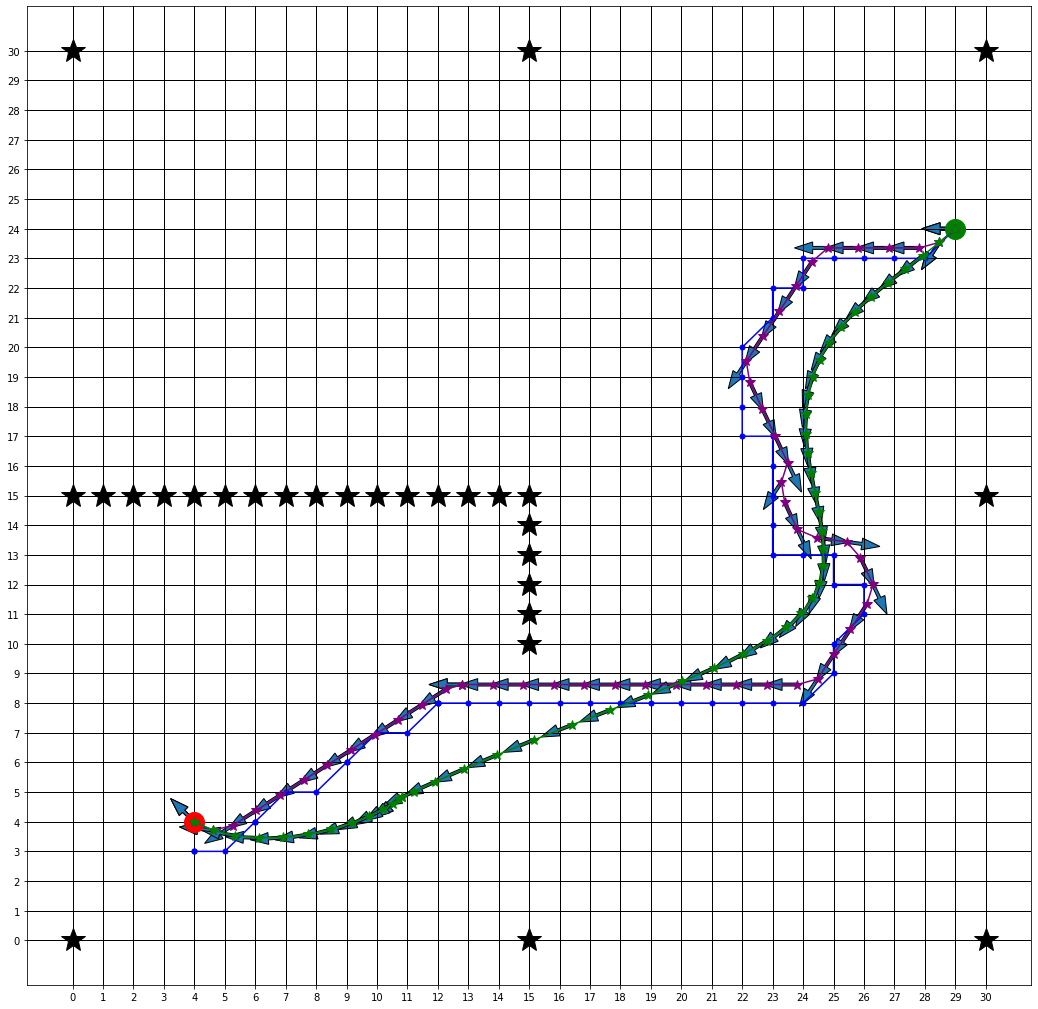

In [22]:
#PRINTER
#colormap
cmap = colors.ListedColormap(['white', 'black'])
bounds = [0,.5,1]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
#x.imshow(data,extent=[0, rows, 0, cols], cmap=cmap, norm=norm)
ax.plot(start.position[0], start.position[1], marker='.', color='green', linestyle='none', MarkerSize=40)
x, y, a, b = start.position[0], start.position[1], 1, np.rad2deg(start.orientation)
x1, y1 = rpoint(x,y,a,b)
plt.arrow(x, y, (x1-x)/2, (y1-y)/2, head_width = .4, width = .1,color='green')
ax.plot(end.position[0], end.position[1], marker='.', color='red', linestyle='none', MarkerSize=40)
x, y, a, b = end.position[0], end.position[1], 1, np.rad2deg(end.orientation)
x1, y1 = rpoint(x,y,a,b)
plt.arrow(x, y, (x1-x)/2, (y1-y)/2, head_width = .4, width = .1,color='red')

ax.plot(path_X, path_Y, marker='.', color='blue', MarkerSize=10)
ax.plot(state_X, state_Y, marker='*', color='purple', MarkerSize=10)
ax.plot(smoothPath_X, smoothPath_Y, marker='*', color='green', MarkerSize=10)
ax.plot(obs_X, obs_Y, marker='*', color='black', MarkerSize=25, linestyle='none')
#draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
ax.set_xticks(np.arange(0, rows, 1))
ax.set_yticks(np.arange(0, cols, 1))
for index in range(len(state_O)):
    x, y, a, b = state_X[index], state_Y[index], 1, np.rad2deg(state_O[index])
    x1, y1 = rpoint(x,y,a,b)
    plt.arrow(x, y, (x1-x)/2, (y1-y)/2, head_width = .4, width = .1,)
for index in range(len(smoothPath_O)):
    x, y, a, b = smoothPath_X[index], smoothPath_Y[index], 1, np.rad2deg(smoothPath_O[index])
    x1, y1 = rpoint(x,y,a,b)
    plt.arrow(x, y, (x1-x)/2, (y1-y)/2, head_width = .4, width = .1,)
    
plt.rcParams['figure.figsize'] = [18, 18]
plt.show()

In [7]:
#Overall Algorithm
#First the car will report any obstacles in its way
#if any, add to map w/ appropriate location
#then perform a* algorithm with global map
#do a check if there's a collision
#if so, run machine learning algorithm to change, unless there are no changes to the map
#Should only use machine learning algo IF and only IF there are changes to the map
#return path to car, use route instructions to move car appropriately

In [ ]:
#ALL MEASUREMENTS IN CM